# How to think about treating heterogeneous initial populations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
import sys
import pickle

It appears that a gamma distribution may be a good fit for picking the hetereogenous population. Normal distributions also work.

In [251]:
u_N = .01
u_SCM = .005
u_TM = 0.30
u_CM = 0.35
u_EM = 0.25
std = 0.05

In [252]:
#pick my initial population
sim = 10000
x = abs(np.random.normal([u_N, u_SCM, u_TM, u_CM, u_EM], std, np.broadcast_arrays(sim,5)))
y = np.sum(x, axis = 1)

for i in range(sim):
    x[i] = x[i]/y[i]

In [253]:
d = 1
LRA = 1

p_n = 0.0015 *d
p_scm = 0.00015 * d
p_tm = 0.005 * d
p_cm = 0.0014 * d
p_em = 0.005 * d

d_n = 0.000666
d_scm = 0.005
d_tm = 0.01
d_cm = 0.00666
d_em = 0.011

n = 0.0017
a = n
w = 1/34#0.1

d_ALL = 0.05

## Define Model

In [254]:
#Define the model
def model(z,t):
    L_n = z[0]
    L_scm = z[2]
    L_tm = z[4]
    L_cm = z[6] 
    L_em = z[8]
    
    A_n = z[1]
    A_scm = z[3]
    A_tm = z[5]
    A_cm = z[7]
    A_em = z[9]
    
    
    #for drug dosings
    dL_ndt = (p_n - d_n)*L_n - a*L_n + w*A_n
    dA_ndt = a*L_n - d_ALL*A_n - w*A_n
    
    dL_scmdt = (p_scm - d_scm)*L_scm - a*L_scm + w*A_scm
    dA_scmdt = a*L_scm - d_ALL*A_scm - w*A_scm
    
    dL_tmdt = (p_tm - d_tm)*L_tm - a*L_tm + w*A_tm
    dA_tmdt = a*L_tm - d_ALL*A_tm - w*A_tm
    
    dL_cmdt = (p_cm - d_cm)*L_cm - a*L_cm + w*A_cm
    dA_cmdt = a*L_cm - d_ALL*A_cm - w*A_cm
    
    dL_emdt = (p_em - d_em)*L_em - a*L_em + w*A_em
    dA_emdt = a*L_em - d_ALL*A_em - w*A_em
    
    
    dzdt = [dL_ndt,dA_ndt,
            dL_scmdt,dA_scmdt,
            dL_tmdt,dA_tmdt,
            dL_cmdt,dA_cmdt,
            dL_emdt,dA_emdt
            ]
    return dzdt

## Set Initial Conditions and Solve for Those Conditions

In [255]:
#initial conditions, there are three
z0 = np.zeros(10)
ctr=0
for i in range(5):
    z0[ctr] = x[5][i]*10**6
    ctr+=2


In [256]:
x[5]

array([0.01352175, 0.0458475 , 0.37749033, 0.37484659, 0.18829383])

In [257]:

#number of time points
tn = 30001

#time points
t = np.linspace(0,tn-1, tn)


#store solutions
#Drug Doses
L_n = np.empty_like(t)
L_scm = np.empty_like(t)
L_tm = np.empty_like(t)
L_cm = np.empty_like(t)
L_em = np.empty_like(t)

A_n = np.empty_like(t)
A_scm = np.empty_like(t)
A_tm = np.empty_like(t)
A_cm = np.empty_like(t)
A_em = np.empty_like(t)
Total = np.empty_like(t)


#record intial

L_n[0] = z0[0]
L_scm[0] = z0[2]
L_tm[0] = z0[4]
L_cm[0] = z0[6] 
L_em[0] = z0[8]

A_n[0] = z0[1]
A_scm[0] = z0[3]
A_tm[0] = z0[5]
A_cm[0] = z0[7]
A_em[0] = z0[9]

Total[0] = np.sum(z0)

#Solve the ODE
for i in range(1,tn):
    tspan = [t[i-1],t[i]]
    # solve for next step
    z = odeint(model,z0,tspan)
    # store solution for plotting
        
    L_n[i] = z[1][0]
    L_scm[i] = z[1][2]
    L_tm[i] = z[1][4]
    L_cm[i] = z[1][6] 
    L_em[i] = z[1][8]
    
    A_n[i] = z[1][1]
    A_scm[i] = z[1][3]
    A_tm[i] = z[1][5]
    A_cm[i] = z[1][7]
    A_em[i] = z[1][9]
    
    Total[i]=np.sum(z[1])
    z0 = z[1] 
    



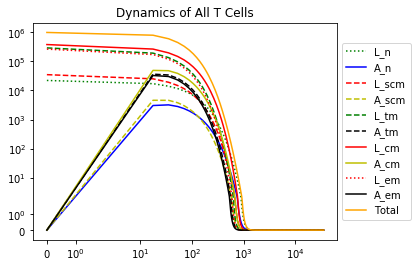

In [344]:
fig, ax = plt.subplots(figsize = (15,4), sharey = True)
ax = plt.subplot(121)
plt.title('Dynamics of All T Cells')
plt.plot(t,L_n,'g:',label='L_n')
plt.plot(t,A_n,'b-',label='A_n')
plt.plot(t,L_scm,'r--',label='L_scm')
plt.plot(t,A_scm,'y--',label='A_scm')
plt.plot(t,L_tm,'g--',label='L_tm')
plt.plot(t,A_tm,'k--',label='A_tm')
plt.plot(t,L_cm,'r',label='L_cm')
plt.plot(t,A_cm,'y-',label='A_cm')
plt.plot(t,L_em,'r:',label='L_em')
plt.plot(t,A_em,'k-',label='A_em')
plt.plot(t,Total,'orange', label = 'Total')
plt.yscale('symlog')
plt.xscale('symlog')

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Get the reduction ratio

In [350]:
#Set list for Pinkevych cure and hill cure
tmp = np.zeros([int(sim),10])
ctr=0
for i in range(5):
    tmp[:,ctr] = x[:,i]*10**6
    ctr+=2
    
hill_cure = 10**2
p_cure = 2*10**3

hill_years = {}
p_years = {}

In [351]:
n_sims = sim

In [352]:
#Populate Hill Year Dictionary
hill_years['d'] = []
hill_years['a'] = []
hill_years['years'] = np.zeros([10,10,n_sims])
#Population P Year Dictionary
p_years['d'] = []
p_years['a'] = []
p_years['years'] = np.zeros([10,10,n_sims])


for i in range(1,11):
    hill_years['d'].append(1/i**2)
    hill_years['a'].append(i)
    
    p_years['d'].append(1/i**2)
    p_years['a'].append(i)

In [353]:
#initial conditions, there are three
for tmp_d, d, in enumerate(hill_years['d']):
    for tmp_n,LRA in enumerate(hill_years['a']):
        #Adjusting parameters:


        p_n = 0.0015 *d
        p_scm = 0.00015 * d
        p_tm = 0.005 * d
        p_cm = 0.0014 * d
        p_em = 0.005 * d

        d_n = 0.000666
        d_scm = 0.005
        d_tm = 0.01
        d_cm = 0.00666
        d_em = 0.011

        n = 0.0017
        a = n * LRA
        w = 1/34#0.1

        d_ALL = 0.05

        #Beging simulation
        for sims in range(n_sims):
            z0 = tmp[sims]

            #number of time points
            tn = 35001
            b = 2000

            #time points
            t = np.linspace(0,tn-1, b)


            #store solutions
            #Drug Doses
            L_n = np.empty_like(t)
            L_scm = np.empty_like(t)
            L_tm = np.empty_like(t)
            L_cm = np.empty_like(t)
            L_em = np.empty_like(t)

            A_n = np.empty_like(t)
            A_scm = np.empty_like(t)
            A_tm = np.empty_like(t)
            A_cm = np.empty_like(t)
            A_em = np.empty_like(t)
            Total = np.empty_like(t)


            #record intial

            L_n[0] = z0[0]
            L_scm[0] = z0[2]
            L_tm[0] = z0[4]
            L_cm[0] = z0[6] 
            L_em[0] = z0[8]

            A_n[0] = z0[1]
            A_scm[0] = z0[3]
            A_tm[0] = z0[5]
            A_cm[0] = z0[7]
            A_em[0] = z0[9]

            Total[0] = np.sum(z0)

            #Solve the ODE
            for i in range(1,b):
                tspan = [t[i-1],t[i]]
                # solve for next step
                z = odeint(model,z0,tspan)
                # store solution for plotting

                L_n[i] = z[1][0]
                L_scm[i] = z[1][2]
                L_tm[i] = z[1][4]
                L_cm[i] = z[1][6] 
                L_em[i] = z[1][8]

                A_n[i] = z[1][1]
                A_scm[i] = z[1][3]
                A_tm[i] = z[1][5]
                A_cm[i] = z[1][7]
                A_em[i] = z[1][9]

                Total[i]=np.sum(z[1])
                z0 = z[1] 

            if t[Total<hill_cure].shape[0] ==0:
                hill_years['years'][tmp_d,tmp_n,sims] = 0
            else:
                hill_years['years'][tmp_d,tmp_n,sims] = t[Total <hill_cure][0]

            if t[Total<p_cure].shape[0] ==0:
                p_years['years'][tmp_d,tmp_n,sims] = 0
            else:
                p_years['years'][tmp_d,tmp_n,sims] = t[Total <p_cure][0]

            sys.stdout.write('\r {},{}, {}'.format(tmp_d,tmp_n,sims) )

 9,9, 9999

# Plotting histogram based on decrease in drop in proliferative capacity

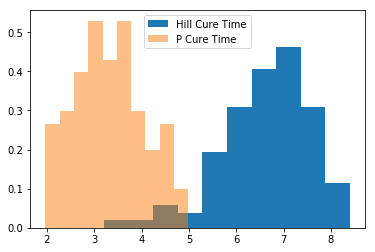

In [334]:
plt.hist(np.divide(hill_years['years'][1,1,:],365).flatten(), label = 'Hill Cure Time', density = True)
plt.hist(np.divide(p_years['years'][1,1,:],365).flatten(), label = 'P Cure Time', density= True, alpha = 0.5)

plt.legend()

In [354]:
pickle.dump(hill_years,open('hill_years_ad_10k.p', 'wb'))
pickle.dump(p_years,open('p_years_ad_10k.p', 'wb'))
pickle.dump(x, open('t_pop_ad_10k.p', 'wb'))

This data, there is a sytematic issue with the recording. For some reason it recorded 2010 observations, not 2000. It looks like the last 2000 observations correspond to the heterogenous pop

In [269]:
len(hill_years['a_years'][0])

161

Text(0.5, 1.0, 'Decrease in Proliferate Rate on Years to Achieve Hill Cure')

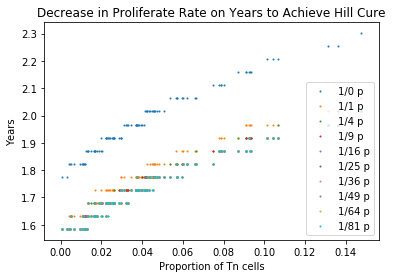

In [342]:
for i in range(10):
    plt.scatter(x.T[0][:100],np.divide(hill_years['years'][i,9,:],365), s = 1, label = '1/{} p'.format(i**2))
#plt.yscale('symlog')
#plt.ylim([2,100])
plt.xlabel('Proportion of Tn cells')
plt.ylabel('Years')
plt.legend(loc = 'lower right')
plt.title('Decrease in Proliferate Rate on Years to Achieve Hill Cure')


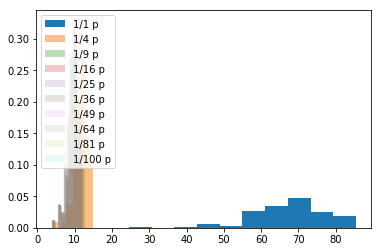

In [341]:
for i in range(0,10):
    plt.hist(np.divide(hill_years['years'][i,0,:],365), label = '1/{} p'.format((i+1)**2), density = True,alpha = 1/(i+1))
plt.legend(loc = 'upper left')

What looks interesting is that it looks like dropping the proliferation rate has a huge effect on the years it take for latent population to reach the p cure and the hill cure. But only to a certain point. You are limited by the initial size of your latent population of naive T cells. A strategy could be to increase naive t cell conversion to a memory t cell, thereby reducing size of naive pop. However, this is super dangerous. 
Another strategy would be to increase activation rate.

In [158]:
cell_labels = ['T_n', 'T_scm', 'T_tm', 'T_cm', 'T_em']

# Summary:
Need to try out model without these naive T cells and see what happens. 
1. Something is a little wonky about the activation parameter. I need to do a parameter scan to look how the activation parameter changes the behavior of the graph. Need to do a vector mapping probably. 
2. A slight increase in the activation rate DRAMATICALLY decreases the latency pop which is a little fishy. I will have to test it more, but it weirds me out that it does that?